In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from LinearRegression import LinearRegression

In [2]:
data_path = Path.cwd()
df = pd.read_csv(data_path / 'online.csv')
df.head(10)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


## Visualize data

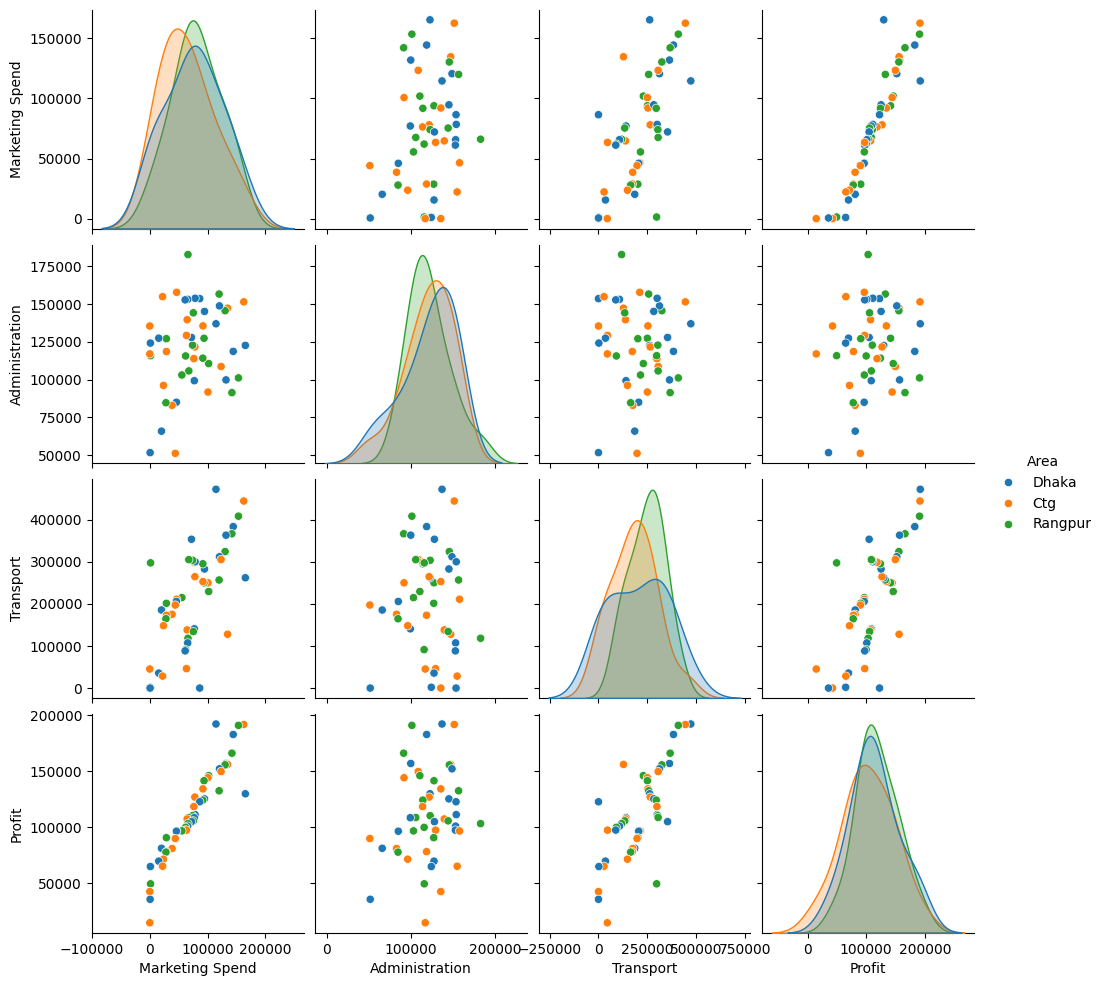

In [3]:
sns.pairplot(df, hue='Area')

<Axes: >

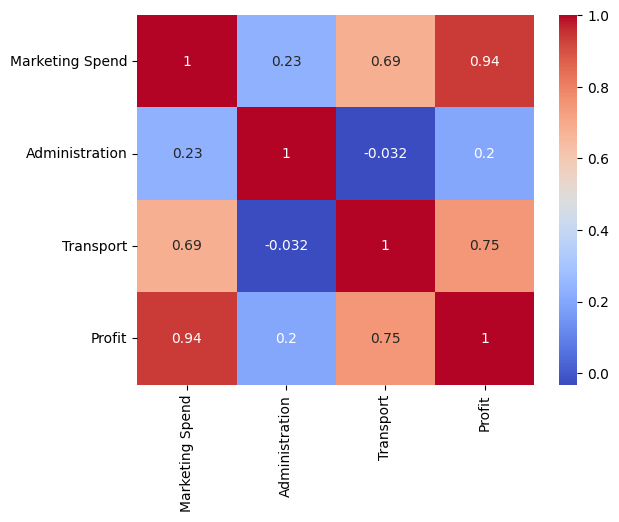

In [4]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

# Prepare data

In [5]:
# # binarize Day of Week to -1 for weekend and 1 for weekday
# df.loc[df['Area']=='Weekend', 'Day of Week']=-1
# df.loc[df['Area']=='Weekday', 'Day of Week']=1

# # binarize smoker to -1 for yes and 1 for no
# df.loc[df['smoker']=='yes', 'smoker']=-1
# df.loc[df['smoker']=='no', 'smoker']=1

# Remove Building Type
if 'Area' in df.columns:
    df = df.drop(['Area'], axis=1)
df.head(10)

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Linear Regression

In [6]:
# Choose features to predict
features = df.columns[:-1]
X, y = df[features].to_numpy(), df[['Profit']].to_numpy()
print(features)

Index(['Marketing Spend', 'Administration', 'Transport'], dtype='object')


In [7]:
model = LinearRegression(lr=1e-12, eps=1e-5)
model.fit(X, y)
y_pred = model.predict(X)
print(f'R-squared: {model.score(y, y_pred):.4f}')


--- Itération 0 ---
MSE = 1.7917948E+10

--- Itération 1000 ---
MSE = 1.1470772E+08

Fit process ended with success
MSE = 114705422.7307644

R-squared: 0.8559


In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=10000, learning_rate='constant', eta0=1e-12, random_state=42)
sgd.fit(X, y)
sgd.score(X, y)
# sgd.coef_

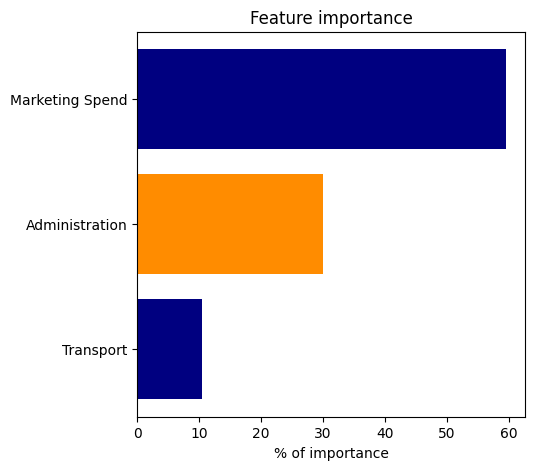

array([[0.9886436 ],
       [0.6414781 ],
       [0.32264184],
       [0.11215284]])

In [8]:
model.featureimportance(names=features)
model.best_params

In [9]:
def plot_mse(y_pred, y_gt, threshold=0):
    error = np.abs(y_pred-y_gt)

    plt.figure(figsize=(30,10))
    plt.stem(error, linefmt='navy')
    plt.hlines(threshold, 0, y_pred.shape[0], lw=2, ls=':', color='darkorange')
    plt.ylabel('|y_pred-y_gt|')
    plt.show()

In [10]:
y_pred = model.predict(X)

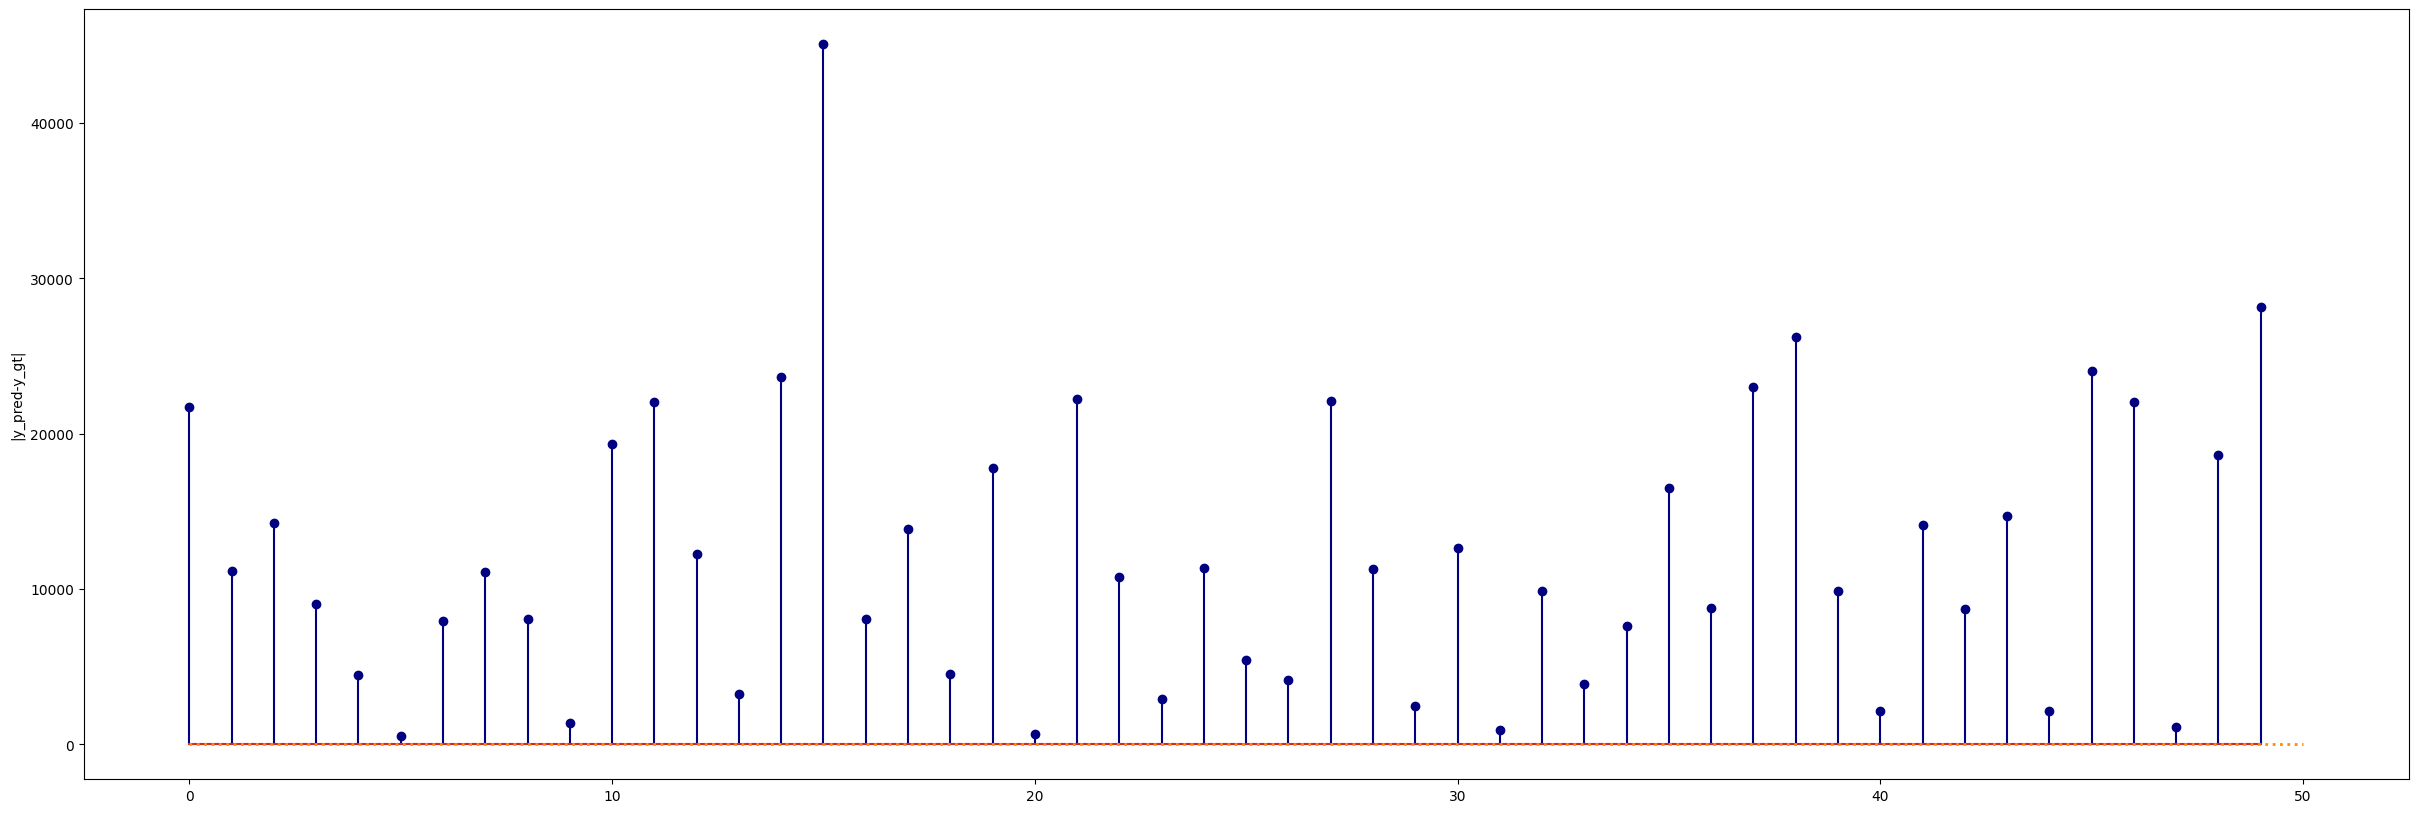

In [11]:
plot_mse(y_pred, y)

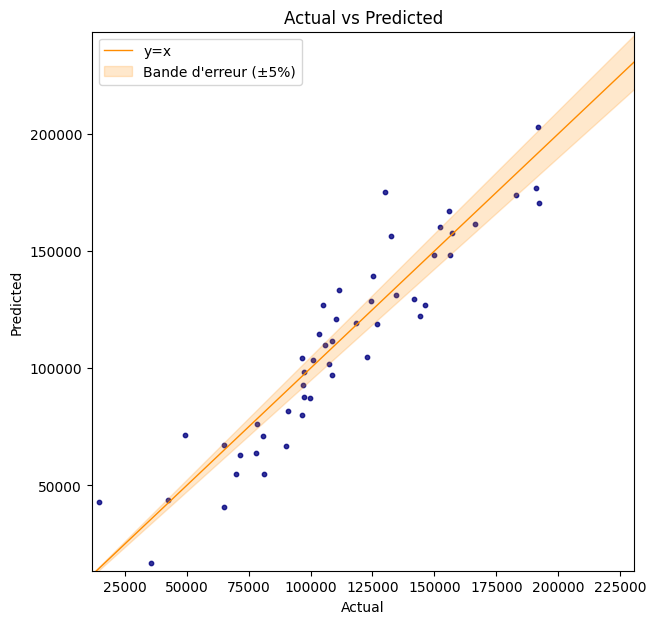

In [12]:
model.plot_actualVSpredicted(y,y_pred)